In [1]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=ad704cc38a99c148c4f1e7cd778cfdc9b5a52cb4d9a52cf315c20c9b58a05107
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [2]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [4]:
def simon(f):
  n=len(f)
  q=QuantumCircuit(2*n,n)
  q.h(range(n))

  for i,val in enumerate(f):
    if val==1:
      for j in range(n):
        q.cx(i,n+j)

  q.h(range(n))
  q.measure(range(n),range(n))
  return q

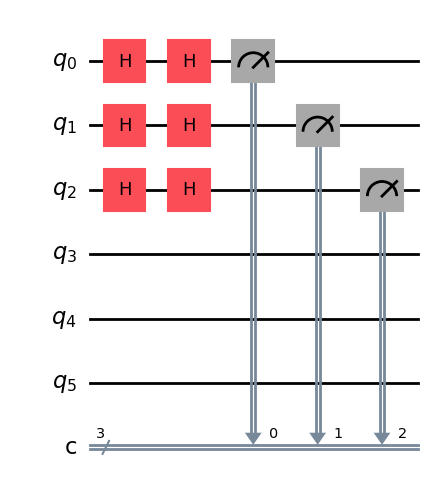

In [5]:
f='110'
simon_ckt=simon(f)
simon_ckt.draw(output='mpl')

In [6]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

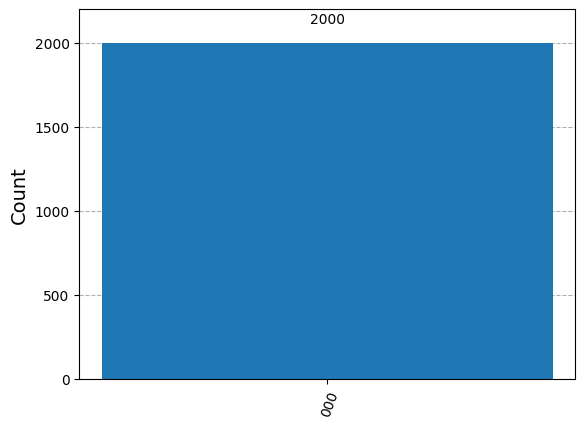

In [7]:
backend=BasicSimulator()
result=backend.run(simon_ckt,shots=2000).result()
counts=result.get_counts()
plot_histogram(counts)

In [8]:
from qiskit.providers.fake_provider import GenericBackendV2

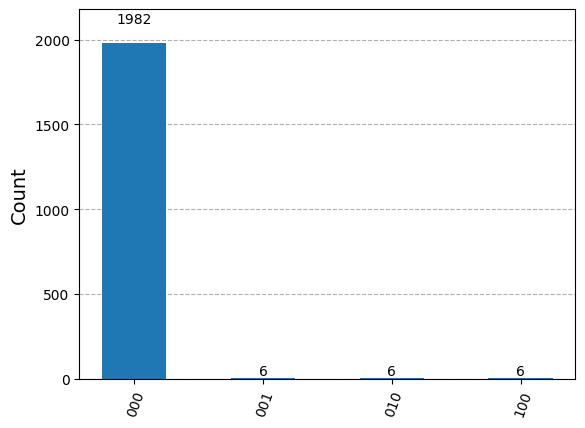

In [10]:
backend=GenericBackendV2(num_qubits=6)
transpiled_ckt=transpile(simon_ckt,backend)
result=backend.run(transpiled_ckt,shots=2000).result()
counts=result.get_counts()
plot_histogram(counts)